-65.0 0.316 0.0 0.607
-47.81596478081476 0.35094884838571655 0.3328864891462565 0.5509577891377435
12.387086464187272 0.37314298148494973 0.47243563843938174 0.5060533430181385
34.69598907956505 0.3694043348415222 0.21859110257188025 0.5117160681520638
14.039587748380566 0.36267304136676565 0.2074594986864996 0.5306301537824614
14.621298766639274 0.3588252353686664 0.0921009729934087 0.5365728929818697
13.218113460358515 0.35494540859918156 0.04253459045159713 0.5426517937913423
11.81400709889268 0.351371393970695 0.024202949766054006 0.5480999506162955
10.554917903148999 0.348108993954195 0.017716865185071904 0.5529513838785589
9.434252621557096 0.3451371208635449 0.015970239919240285 0.5572847066073798
8.43524550125947 0.3424336833847663 0.016255878330008553 0.5611665010506237
7.542482262057978 0.33997782588487363 0.017466586675097928 0.5646509640524678
6.742804691415079 0.3377501044697995 0.01911603558487105 0.5677827446789037
6.025090035355 0.3357324215094918 0.02097458166323328 0.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

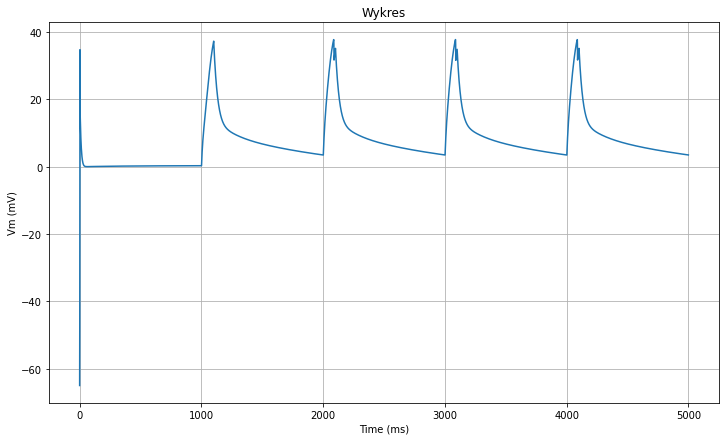

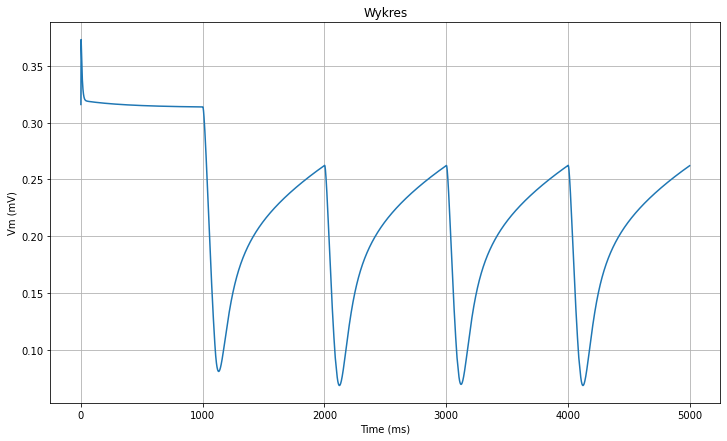

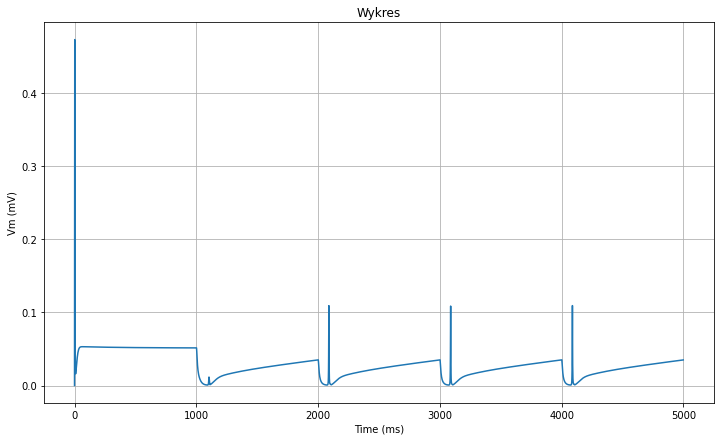

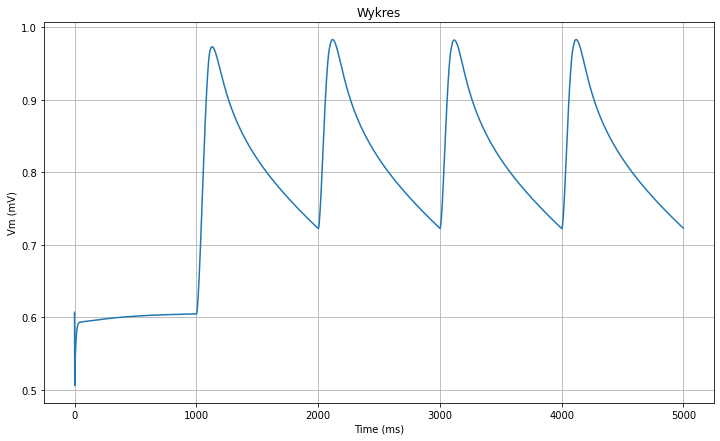

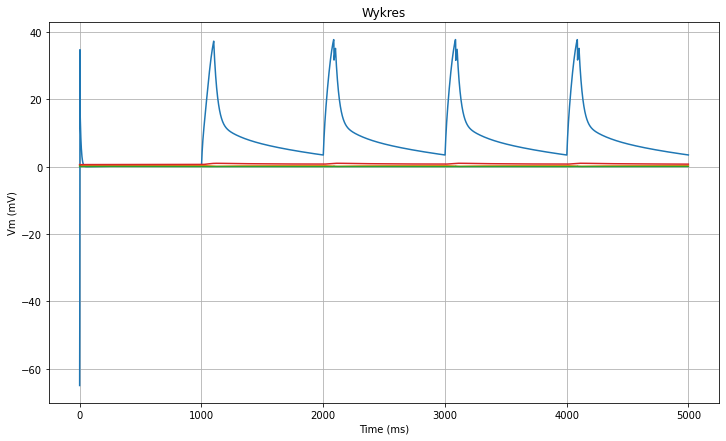

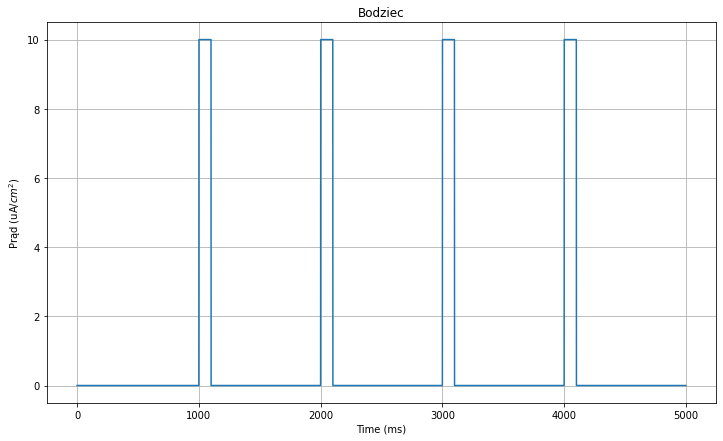

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy as sp
from google.colab import files
import pandas as pd
from tabulate import tabulate

class HH(object):
  def __init__(self,Vk=-12,Vna=120,Vl=10.6,gK=36,gNa=120, gL=0.3, Cm=1, m0=0, n0=0.316, h0=0.607, time=5000):
    self.Vk=Vk
    self.Vna=Vna
    self.Vl =Vl
    self.gK=gK
    self.gNa= gNa
    self.gL= gL
    self.Cm=Cm
    self.m0=m0
    self.n0=n0
    self.h0=h0
    self.time=time


  def alfa_m(self, V):
    return (0.1*(V+25))/(np.exp((V+25)/10)-1)
  
  def beta_m(self, V):
    return 4*np.exp(V/18)

  def alfa_n(self, V):
    return (0.01*(V+10))/(np.exp((V+10)/10)-1)

  def beta_n(self, V):
    return 0.125*np.exp(V/80)

  def alfa_h(self, V):
    return 0.07*np.exp(V/20)
  
  def beta_h(self, V):
    return 1/(np.exp((V+30)/10)+1)

  def I_init(self, t):
    if ((1000<t<=1100)or(2000<t<=2100)or(3000<t<3100)or(4000<t<=4100)):
      return 10
    else:
      return 0

  def main(self):
    tau = 0.1
    V=np.zeros(self.time)
    V1=np.zeros(self.time)
    V2=np.zeros(self.time)
    V3=np.zeros(self.time)
    V4=np.zeros(self.time)
    m=np.zeros(self.time)
    m1=np.zeros(self.time)
    m2=np.zeros(self.time)
    m3=np.zeros(self.time)
    m4=np.zeros(self.time)
    n=np.zeros(self.time)
    n1=np.zeros(self.time)
    n2=np.zeros(self.time)
    n3=np.zeros(self.time)
    n4=np.zeros(self.time)
    h=np.zeros(self.time)
    h1=np.zeros(self.time)
    h2=np.zeros(self.time)
    h3=np.zeros(self.time)
    h4=np.zeros(self.time)

    V[0]=-65
    m[0]=self.m0
    n[0]=self.n0
    h[0]=self.h0

    for i in range(self.time-1):
      
      n1[i+1]=tau*(self.alfa_n(V[i])*(1-n[i])-self.beta_n(V[i])*n[i])
      n2[i+1]=tau*(self.alfa_n(V[i])*(1-(n[i]+0.5*n1[i+1]))-self.beta_n(V[i])*(n[i]+0.5*n1[i+1]))
      n3[i+1]=tau*(self.alfa_n(V[i])*(1-(n[i]+0.5*n2[i+1]))-self.beta_n(V[i])*(n[i]+0.5*n2[i+1]))
      n4[i+1]=tau*(self.alfa_n(V[i])*(1-(n[i]+n3[i+1]))-self.beta_n(V[i])*(n[i]+n3[i+1]))
      n[i+1]=n[i]+(n1[i+1]/6)+(n2[i+1]/3)+(n3[i+1]/3)+(n4[i+1]/6)
      m1[i+1]=tau*(self.alfa_m(V[i])*(1-m[i])-self.beta_m(V[i])*m[i])
      m2[i+1]=tau*(self.alfa_m(V[i])*(1-(m[i]+0.5*m1[i+1]))-self.beta_m(V[i])*(m[i]+0.5*m1[i+1]))
      m3[i+1]=tau*(self.alfa_m(V[i])*(1-(m[i]+0.5*m2[i+1]))-self.beta_m(V[i])*(m[i]+0.5*m2[i+1]))
      m4[i+1]=tau*(self.alfa_m(V[i])*(1-(m[i]+m3[i+1]))-self.beta_m(V[i])*(m[i]+m3[i+1]))
      m[i+1]=m[i]+m1[i+1]/6+m2[i+1]/3+m3[i+1]/3+m4[i+1]/6
      h1[i+1]=tau*(self.alfa_h(V[i])*(1-h[i])-self.beta_h(V[i])*h[i])
      h2[i+1]=tau*(self.alfa_h(V[i])*(1-(h[i]+0.5*h1[i+1]))-self.beta_h(V[i])*(h[i]+0.5*h1[i+1]))
      h3[i+1]=tau*(self.alfa_h(V[i])*(1-(h[i]+0.5*h2[i+1]))-self.beta_h(V[i])*(h[i]+0.5*h2[i+1]))
      h4[i+1]=tau*(self.alfa_h(V[i])*(1-(h[i]+h3[i+1]))-self.beta_h(V[i])*(h[i]+h3[i+1]))
      h[i+1]=h[i]+h1[i+1]/6+h2[i+1]/3+h3[i+1]/3+h4[i+1]/6
      V1[i+1]=tau*((self.I_init(i)-self.gK*(n[i]**4)*(V[i]-self.Vk)-self.gNa*(m[i]**3)*h[i]*(V[i]-self.Vna)-self.gL*(V[i]-self.Vl))*(1/self.Cm))
      V2[i+1]=tau*((self.I_init(i)-self.gK*((n[i]+0.5*n1[i+1])**4)*((V[i]+0.5*V1[i+1])-self.Vk)-self.gNa*((m[i]+0.5*m1[i+1])**3)*(h[i]+0.5*h1[i+1])*((V[i]+0.5*V1[i+1])-self.Vna)-self.gL*((V[i]+0.5*V1[i+1])-self.Vl))*(1/self.Cm))
      V3[i+1]=tau*((self.I_init(i)-self.gK*((n[i]+0.5*n2[i+1])**4)*((V[i]+0.5*V2[i+1])-self.Vk)-self.gNa*((m[i]+0.5*m2[i+1])**3)*(h[i]+0.5*h2[i+1])*((V[i]+0.5*V2[i+1])-self.Vna)-self.gL*((V[i]+0.5*V2[i+1])-self.Vl))*(1/self.Cm))
      V4[i+1]=tau*((self.I_init(i)-self.gK*((n[i]+n3[i+1])**4)*((V[i]+V3[i+1])-self.Vk)-self.gNa*((m[i]+m3[i+1])**3)*(h[i]+h3[i+1])*((V[i]+V3[i+1])-self.Vna)-self.gL*((V[i]+V3[i+1])-self.Vl))*(1/self.Cm))
      V[i+1]=V[i]+V1[i+1]/6+V2[i+1]/3+V3[i+1]/3+V4[i+1]/6
      print(V[i],n[i],m[i],h[i])
    return V, n, m, h
    
    
  def show(self, X, nazwa):
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.plot(X)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Vm (mV)')
    ax.set_title('Wykres')
    plt.grid()
    plt.savefig(nazwa+'.png')
    files.download(nazwa+".png")

  def show_all(self, X, nazwa):
    fig, ax = plt.subplots(figsize=(12, 7))
    X= np.array(X)
    ax.plot(X.transpose())
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Vm (mV)')
    ax.set_title('Wykres')
    plt.grid()
    plt.savefig(nazwa+'.png')
    files.download(nazwa+".png")


  def show_I(self,nazwa):
    Idv = [self.I_init(t) for t in range(self.time)]

    fig, ax = plt.subplots(figsize=(12, 7))
    ax.plot(Idv)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel(r'Prąd (uA/$cm^2$)')
    ax.set_title('Bodziec')
    plt.grid()
    plt.savefig(nazwa+'.png')
    files.download(nazwa+".png") 

  

hodkin= HH()
V = hodkin.main()
V=np.array(V)
print 
hodkin.show(V[0], "wykres V")
hodkin.show(V[1],"wykres n")
hodkin.show(V[2],"wykres m")
hodkin.show(V[3],"wykres h")

hodkin.show_all(V,"wykresik")
hodkin.show_I("pradWykres")